<a href="https://colab.research.google.com/github/andreac941/tutorials/blob/main/A2b_DL_TC5033_AD2023_andrea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
! pip install jupyterthemes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00


In [21]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch.optim as optim

#only if you have jupyterthemes
from jupyterthemes import jtplot
jtplot.style()

### Download Cifar10 dataset

In [3]:
torch.cuda.is_available()

True

In [4]:
import torch
from torchvision import datasets, transforms as T
from torch.utils.data import DataLoader, sampler

# Set the path for the CIFAR-10 dataset
DATA_PATH = './cifar10_data' # You can change this to your desired path
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_cifar)  # Note: Validation set should also use train=True
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, NUM_TRAIN+NUM_VAL)))

# Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TEST)))



100%|██████████| 170498071/170498071 [00:01<00:00, 104427556.33it/s]


Extracting ./cifar10_data/cifar-10-python.tar.gz to ./cifar10_data
Files already downloaded and verified
Files already downloaded and verified


In [5]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./cifar10_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [6]:
train_loader.batch_size

64

In [7]:
type(cifar10_train[0])

tuple

In [8]:
image, label = cifar10_train[0]
type(image)

torch.Tensor

In [9]:
image.shape

torch.Size([3, 32, 32])

In [10]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [-1.2734e+00, -1.2575e+00, -1.2416e+00,  ..., -1.3845e+00,
           -1.3369e+00, -1.2893e+00],
          ...,
          [-7.8122e-01, -7.4946e-01, -6.3833e-01,  ...,  1.2622e-02,
            1.2622e-02, -1.7790e-01],
          [-7.8122e-01, -7.3359e-01, -6.3833e-01,  ..., -2.2553e-01,
           -1.7790e-01, -2.2553e-01],
          [-6.8596e-01, -6.2245e-01, -6.7008e-01,  ..., -2.0965e-01,
           -1.6202e-01, -1.7790e-01]],

         [[-7.2476e-01, -7.0863e-01, -6.7635e-01,  ..., -6.9249e-01,
           -7.2476e-01, -8.3773e-01],
          [-6.2794e-01, -6.1180e-01, -6.1180e-01,  ..., -6.4407e-01,
           -6.6021e-01, -8.0545e-01],
          [-5.6338e-01, -5.4724e-01, -5.3111e-01,  ..., -5.9566e-01,
           -6.2794e-01, -7.2476e-01],
          ...,
          [-9.0228e-01, -8.7001e-01, -7.5704e-01,  ..., -9.5376e-02,
           -6.3100e-02, -2.5676e-01],
          [-9.0228e-01, -8.5387e-01, -7.7318e-01,  

### Using  GPUs

In [11]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: ship


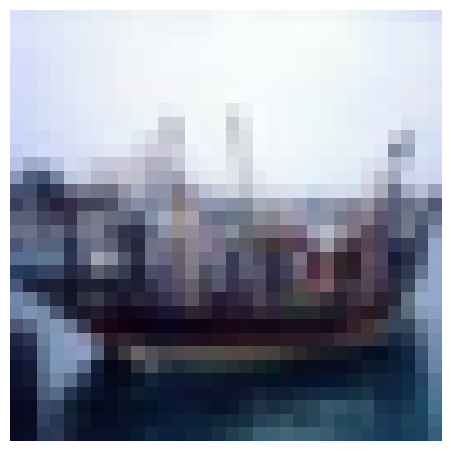

In [12]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


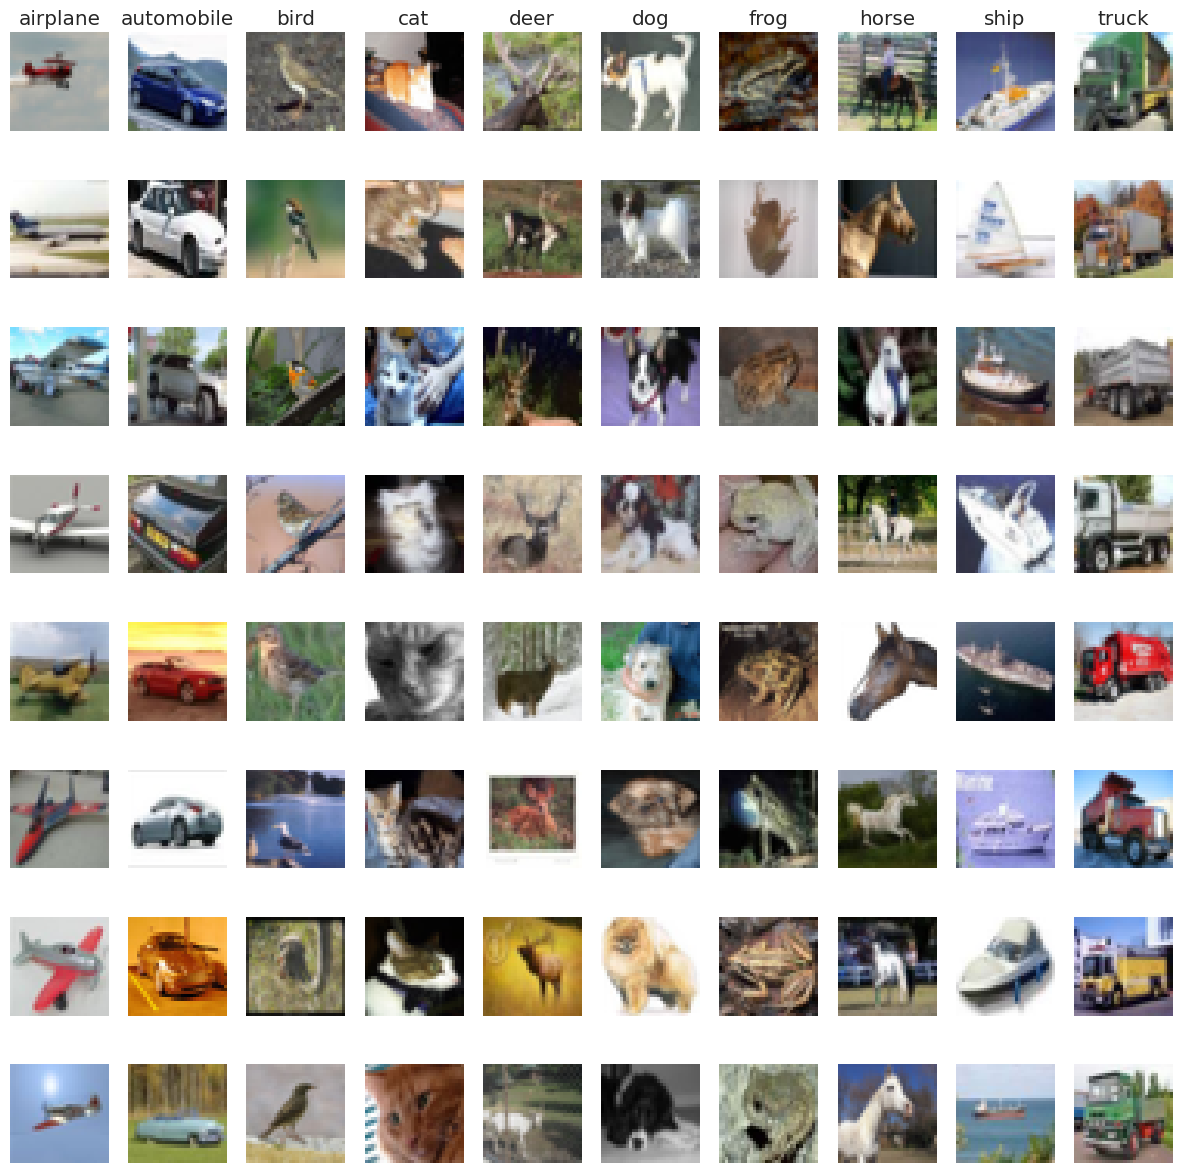

In [13]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [14]:
def accuracy(model, loader):
    """
    Computes the accuracy of the given model on the data provided by the loader.

    Args:
    - model (nn.Module): The neural network model.
    - loader (DataLoader): DataLoader for the dataset on which accuracy is to be calculated.

    Returns:
    - float: Accuracy of the model on the data provided by the loader.
    """

    # Ensure the model is in evaluation mode
    model.eval()

    # Initialize counters
    num_correct = 0
    num_samples = 0

    # Use torch.no_grad to indicate to PyTorch that gradients should not be calculated
    with torch.no_grad():
        for x, y in loader:
            # Move data to the same device as the model (useful in case of GPUs)
            # x = x.to(device=model.device)
            # y = y.to(device=model.device)

            # Get the model predictions
            scores = model(x)
            _, predictions = scores.max(1)  # Get the index of max log-probability as the prediction

            # Update counters
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

    # Calculate accuracy
    acc = float(num_correct) / num_samples
    return acc

# Display the function for verification
accuracy

<function __main__.accuracy(model, loader)>

### Loop de entrenamiento

In [16]:
# Modifying the train function to determine the device correctly

def train(model, optimizer, epochs=100, loader=None, loss_fn=None):
    """
    Trains the given model using the specified optimizer and number of epochs.

    Args:
    - model (nn.Module): The neural network model.
    - optimizer (torch.optim.Optimizer): The optimizer for training.
    - epochs (int): Number of epochs for training. Default is 100.
    - loader (DataLoader): DataLoader for the training dataset.
    - loss_fn (nn.Module): Loss function. If None, uses CrossEntropyLoss.

    Returns:
    - list: List of losses for each epoch.
    """

    # Use CrossEntropyLoss by default if no loss function is provided
    if loss_fn is None:
        loss_fn = nn.CrossEntropyLoss()

    # Determine the device
    device = next(model.parameters()).device

    # List to store losses
    losses = []

    # Set the model to training mode
    model.train()

    for epoch in range(epochs):
        # Initialize epoch loss
        epoch_loss = 0.0

        for x, y in loader:
            # Move data to the determined device
            x = x.to(device=device)
            y = y.to(device=device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            scores = model(x)
            loss = loss_fn(scores, y)

            # Backward pass
            loss.backward()

            # Update model parameters
            optimizer.step()

            # Accumulate the loss
            epoch_loss += loss.item()

        # Average epoch loss
        avg_epoch_loss = epoch_loss / len(loader)
        losses.append(avg_epoch_loss)

        # Print loss for every 10 epochs
        if epoch % 10 == 0:
            print(f"Epoch [{epoch}/{epochs}], Loss: {avg_epoch_loss:.4f}")

    return losses

# Return the modified function for verification
train

<function __main__.train(model, optimizer, epochs=100, loader=None, loss_fn=None)>

### Linear model

In [17]:
# To do: Use PyTorch to create a linear model to have an initial baseline model

import torch.nn as nn

class LinearModel(nn.Module):
    """
    A simple linear model for the CIFAR-10 dataset.
    """
    def __init__(self, input_dim=3072, num_classes=10):
        super(LinearModel, self).__init__()

        # Define the linear layer
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)

        # Apply the linear transformation
        out = self.fc(x)
        return out

# Instantiate the model and display its architecture
linear_model = LinearModel()
linear_model

LinearModel(
  (fc): Linear(in_features=3072, out_features=10, bias=True)
)

In [16]:
# 1. Instantiate the linear model
model1 = LinearModel()

# 2. Define an optimizer
learning_rate = 1e-2
optimiser = optim.SGD(model1.parameters(), lr=learning_rate)
epochs=30

train(model1, optimiser,epochs, train_loader)

Epoch [0/20], Loss: 8.0464
Epoch [10/20], Loss: 7.0431


[8.046427918821955,
 7.846214027051121,
 7.566118676949035,
 7.460741911702754,
 7.368154042822016,
 7.378701923753295,
 7.346521598908603,
 7.2181182804010104,
 7.219962676162915,
 7.164085576601345,
 7.043107772117381,
 7.19926584529145,
 7.289715368119652,
 7.203937661617308,
 7.1628501784161225,
 7.12780472750554,
 7.197301842672441,
 7.227262643292127,
 7.16227032888271,
 7.104018522650384]

In [17]:
accuracy(model1,train_loader)

0.31738

In [32]:
#otro intento:

#import torch.nn.functional as F
class LinearModel1(nn.Module):
    """
    A simple linear model for the CIFAR-10 dataset.
    """
    def __init__(self, input_dim=32*32*3, num_classes=10): #3072 = 32*32*3
        super().__init__()

        # Define the linear layer
        self.fc1 = nn.Linear(input_dim, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)
        #self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Flatten the input tensor
        x = x.view(x.size(0), -1)

        # Apply the linear transformation
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return F.log_softmax(x, dim=1)

# Instantiate the model and display its architecture
linear_model = LinearModel1()
linear_model

LinearModel1(
  (fc1): Linear(in_features=3072, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
# 1. Instantiate the linear model
model2 = LinearModel1()

# 2. Define an optimizer
learning_rate = 1e-2
#criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=learning_rate)
epochs=30

train(model2, optimizer,epochs, train_loader)

Epoch [0/30], Loss: 1.9001
Epoch [10/30], Loss: 1.1981
Epoch [20/30], Loss: 0.9799


[1.9000902671338347,
 1.6467276694219741,
 1.5471237108225713,
 1.47840560915525,
 1.4228903437819322,
 1.3742438176708758,
 1.331218637011545,
 1.2919938479695479,
 1.2600490091859227,
 1.2273520978972734,
 1.1981271030500418,
 1.1707038472375602,
 1.1460170383038728,
 1.1243329587799813,
 1.0994884701793457,
 1.0771807968768927,
 1.0564267448604565,
 1.0341961120095704,
 1.0157229907219978,
 0.9954859410862789,
 0.9798665480388095,
 0.9597136052063359,
 0.9426260588266661,
 0.9262569548223939,
 0.9092878190147907,
 0.8917322687023436,
 0.8794540576922619,
 0.8617869987512183,
 0.8464996754513372,
 0.8353573170769245]

In [31]:
accuracy(model2,train_loader)

0.72824

In [ ]:
#https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
#https://datahacker.rs/009-pytorch-building-an-artificial-neural-network-with-perceprton-on-cifar10-using-pytorch/

### Sequential CNN

In [ ]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()

        # Define the convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(p=0.25) # dropout del 25%
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout(p=0.5) # dropout del 50%
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)

        # Define the pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Define the fully connected layers
        self.fc1 = nn.Linear(64 * 4 * 4, 512)  # CIFAR-10 images are 32x32. After 3 pooling layers, they become 4x4
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Apply conv layers followed by pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        # Flatten the tensor
        x = x.view(-1, 64 * 4 * 4)

        # Apply the fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

# Instantiate the CNN model
modelCNN1 = SimpleCNN()
modelCNN1

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.5, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:


# 2. Define an optimizer
learning_rate = 1e-2


optimiser1 = optim.SGD(modelCNN1.parameters(), lr=learning_rate)
epochs=10

train(modelCNN1, optimiser1, epochs,train_loader)

Epoch [0/10], Loss: 1.0494


[1.0494012944686137,
 0.9915581267812977,
 0.9379181387784231,
 0.8934623983205127,
 0.8494789213170786,
 0.8025307287950345,
 0.7643875511329802,
 0.723481376533923,
 0.6819652958446757,
 0.6477557134902691]

In [ ]:
accuracy(modelCNN1,train_loader)


0.74726